# Práctica 7. Clustering

---

## 1. Usando K-means y el archivo wine.csv realiza los siguientes ejercicios:

* Para k = 1, ..., 10. Calcula el WCSS para cada k y graficalos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

dataset = pd.read_csv('wine.csv')
X = dataset.iloc[:, :13].values

In [3]:
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=4)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)


Text(0, 0.5, 'Silhouette Score')

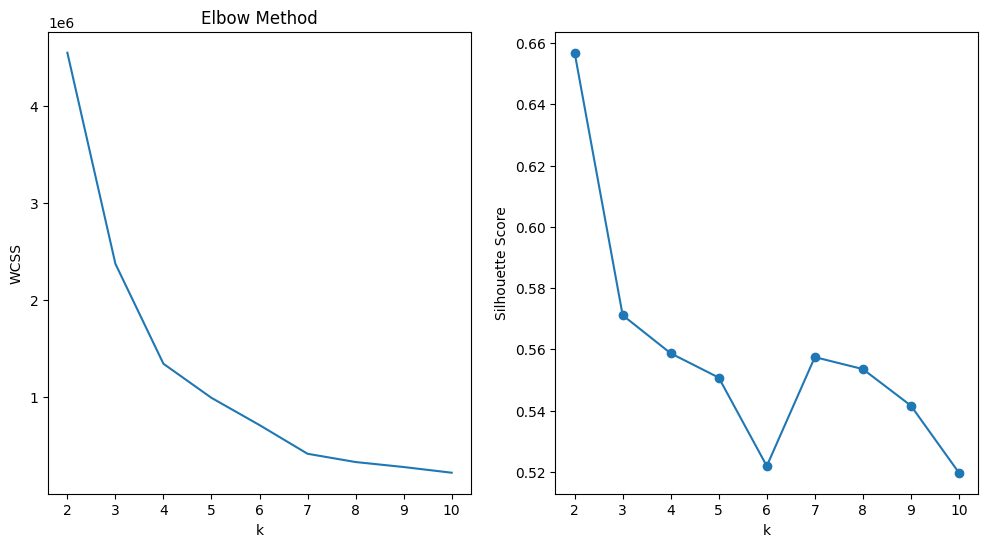

In [4]:
fig = plt.figure(figsize=(12, 6))
(fig1, fig2) = fig.subplots(1, 2)

fig1.plot(range(2, 11), wcss)
fig1.set_xlabel('k')
fig1.set_ylabel('WCSS')
fig1.set_title('Elbow Method')

fig2.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
fig2.set_xlabel('k')
fig2.set_ylabel('Silhouette Score')

* Justifica qué valor de k sería el más *óptimo*

Utilizando el "método del codo" con la gráfica de $WCSS$ vs $k$, se puede observar que los posibles mejores valores para $k$ son 3 y 4, sin embargo, al graficar el $silhouette\; score$ vs $k$ se puede observar que el valor más alto está en 3. Por lo tanto, se puede decir que $k = 3$ es el valor óptimo.

* Obtén las diferentes clases de vinos.

In [5]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state=4)
kmeans.fit(X)
Y_pred = kmeans.labels_
Y_pred


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

## 2. Usando el archivo clusters.csv realiza lo siguiente:

* #### Utiliza $Hierarchical\; clustering$, $K-Means$, $DBSCAN$ y $Gaussian\; Mixture$ para obtener los diferentes clusters.

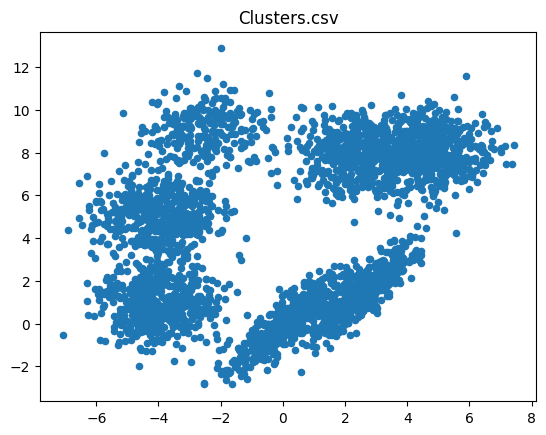

In [80]:
dataset = pd.read_csv('clusters.csv')
X = dataset.iloc[:, :].values

plt.title('Clusters.csv')
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.show()

#### Hierarchical Clustering

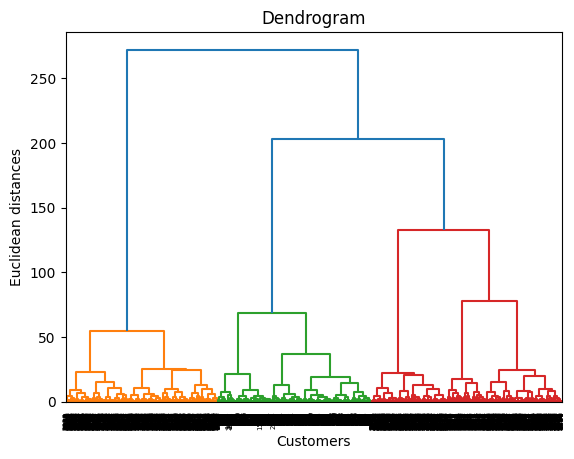

In [3]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

#### K-Means

Text(0, 0.5, 'Silhouette Score')

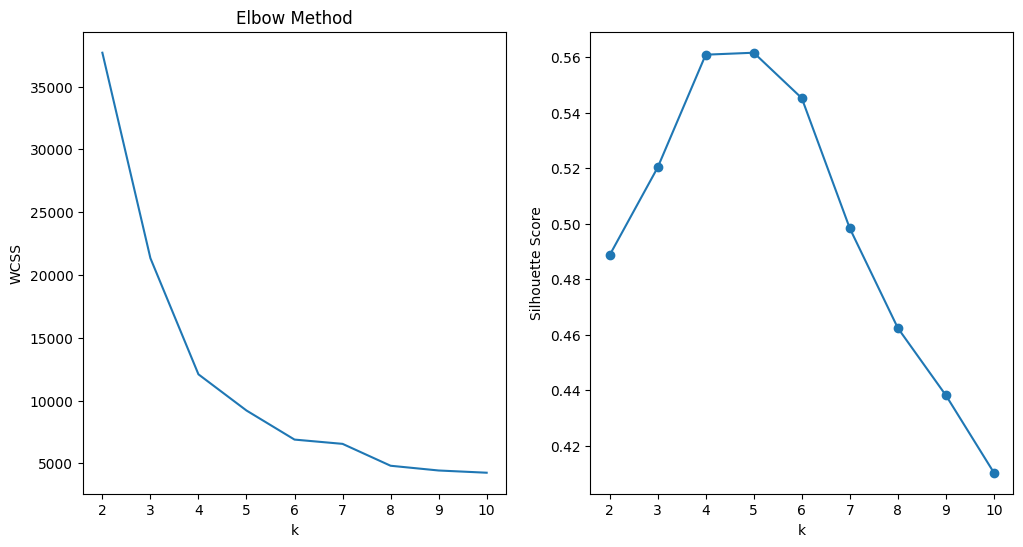

In [86]:
wcss = []
silhouette_scores = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=4)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

fig = plt.figure(figsize=(12, 6))
(fig1, fig2) = fig.subplots(1, 2)

fig1.plot(range(2, 11), wcss)
fig1.set_xlabel('k')
fig1.set_ylabel('WCSS')
fig1.set_title('Elbow Method')

fig2.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
fig2.set_xlabel('k')
fig2.set_ylabel('Silhouette Score')

Utilizando el $método\; del\; codo$ se puede observar que los posibles mejores valores para $k$ están entre $4$ y $6$, y observando la gráfica de $silhouette\; score$ se puede observar que el valor más alto está en 5. Por lo tanto, el mejor valor es $k = 5$.

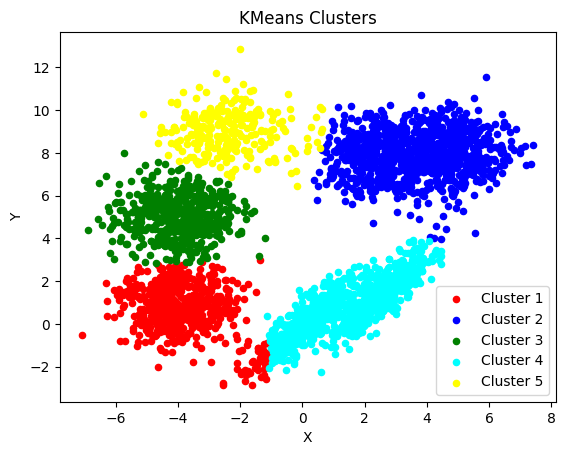

In [88]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state=4)
y_pred = kmeans.fit_predict(X)

plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 20, c = 'yellow', label = 'Cluster 5')
plt.title('KMeans Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

#### DBSCAN

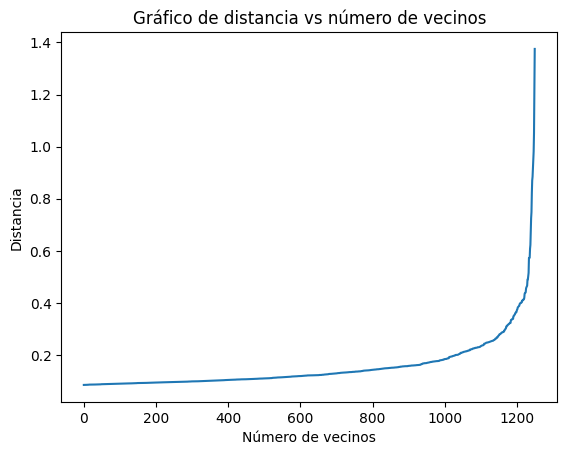

In [64]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances[2000:])
plt.xlabel('Número de vecinos')
plt.ylabel('Distancia')
plt.title('Gráfico de distancia vs número de vecinos')
plt.show()

Utilizando el $Método\; del\; codo$ con la gráfica de distancias para elegir el valor de $epsilon$, se puede observar que el $codo$ se encuentra aproximadamente en $3.5$

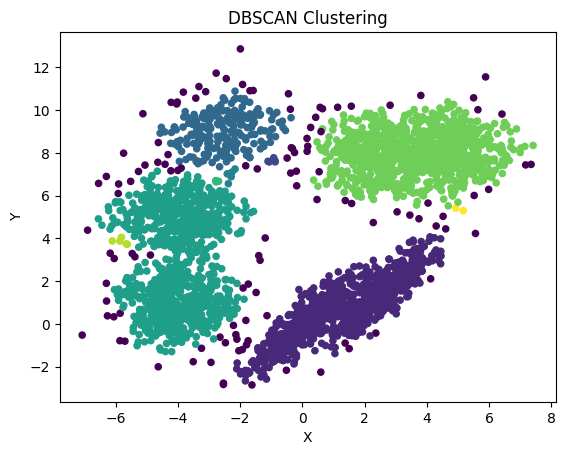

In [78]:
from sklearn.cluster import DBSCAN

epsilon = .35
dbscan = DBSCAN(eps=epsilon, min_samples=4)
dbscan.fit(X)

labels = dbscan.labels_
plt.scatter(X[:, 0], X[:, 1], c=labels, s=20)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clustering')
plt.show()

#### Gaussian Mixture

Text(0, 0.5, 'Silhouette Score')

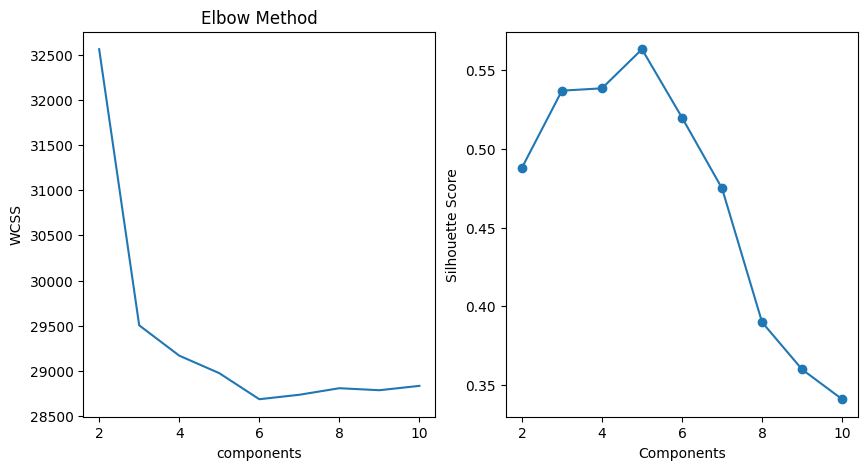

In [70]:
from sklearn.mixture import GaussianMixture

wcss = []
silhouette_scores = []

for i in range(2, 11):
    gm = GaussianMixture(n_components=i, init_params='k-means++', random_state=4)
    labels = gm.fit_predict(X)
    wcss.append(gm.bic(X))
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

fig = plt.figure(figsize=(10, 5))
(fig1, fig2) = fig.subplots(1, 2)

fig1.plot(range(2, 11), wcss)
fig1.set_xlabel('components')
fig1.set_ylabel('WCSS')
fig1.set_title('Elbow Method')

fig2.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
fig2.set_xlabel('Components')
fig2.set_ylabel('Silhouette Score')

De nuevo, utilizando el $Método\; del\; codo$ con la gráfica de WCSS y el $Silhouette\; Score$, se obtiene que el mejor valor para el número de clusters es $5$.

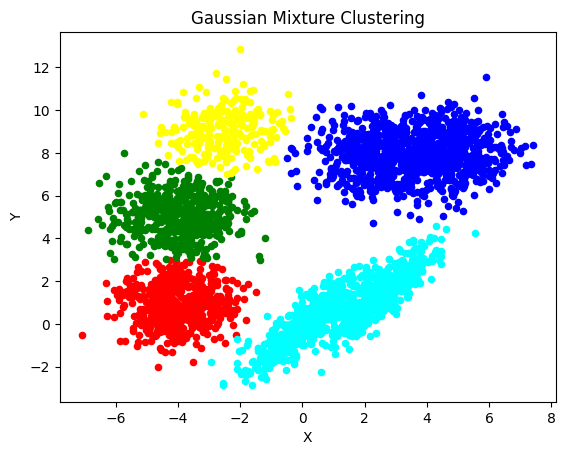

In [77]:
gm = GaussianMixture(n_components=5, init_params='k-means++', random_state=4)
y_pred = gm.fit_predict(X)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 20, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 20, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 20, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s = 20, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s = 20, c = 'yellow', label = 'Cluster 5')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gaussian Mixture Clustering')
plt.show()

* #### ¿Cuál es el número óptimo de clusters para este conjunto de datos? Justifica tu respuesta.

Al utilizar diferentes métodos para obtener el mejor valor para cada modelo, se obtuvo, en la mayoría de los modelos, que el mejor valor para la cantidad de $clusters$ es $5$.

* #### Compara los resultados entre los diferentes algoritmos. ¿Cuál es el mejor algoritmo para clasificar este conjunto de datos?

In [99]:
silhouette_hc = silhouette_score(X, sch.fcluster(sch.linkage(X, method='ward'), t=4, criterion='maxclust'))
silhouette_km = silhouette_score(X, kmeans.labels_)
silhouette_dbs = silhouette_score(X, dbscan.labels_)
silhouette_gm = silhouette_score(X, gm.fit_predict(X))

final_silhouettes = pd.DataFrame({'Modelo': ['Herarchical Clustering', 'K-means', 'DBSCAN', 'Gaussian Mixture'],
                                  'Silhouette Score': [silhouette_hc, silhouette_km, silhouette_dbs, silhouette_gm]})

final_silhouettes

,Modelo,Silhouette Score
0,Herarchical Clustering,0.553861
1,K-means,0.561571
2,DBSCAN,0.174672
3,Gaussian Mixture,0.563413


Comparando los valores finales de $Silhouette\; Score$, $K-means$ y $Gaussian\; Mixture$ obtuvieron los mejores valores, sin embargo, $Gaussian\; Mixture$ obtuvo un mayor puntaje (por poco) y en la gráfica se puede observar una mejor clasificación. Por lo tanto, el mejor algoritmo para clasificar éste conjunto de datos es $Gaussian\; Mixture$.